In [21]:
#ETL Extract Transform Load
import torch #contains methods and stuff like torch.tensor
import torchvision #provides access top popular datasets for vision problems
import torchvision.transforms as transforms_package #dataset lai tensor ma transform garna kaam lagxa

# What is a PIL imaage?
# Python Imaging Library (abbreviated as PIL) (in newer versions known as Pillow)
# is a free library for the Python programming language that adds support for opening, manipulating, and saving
# many different image file formats.


# torchvision.transforms.ToTensor() converts a PIL Image or numpy.ndarray to tensor.
# Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W)

#in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
#or if the numpy.ndarray has dtype = np.uint8
# In the other cases, tensors are returned without scaling.
#Note that it is C x H x W and not C x W x H




import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
torch.set_printoptions(linewidth = 120)
#setprintoptions: The number of characters per line for the purpose of inserting line breaks (default 75).
#Transforms are common image transformations. They can be chained together using Compose

#PREPARE DATA : ETL
#E Extract data from the source, say we wanna uswe the fashion-MNIST dataset ,we use the link provided in the class definition
#T Transform the data into tensor form from a grayscale image provided by the dataset
#L Load/ Put the transformed tensor into an object to make it easily accessible
#For ETL PyTorch gives us 2 classes:  torch.utils.data.Dataset and torch.utils.data.DataLoader

#Dataset is an abstract class for representing a dataset
#If you remember from your tedious undergrad days, an abstrct class is the one whose function definitions are
#not readily available and need to be implemented, you extend the abstract class and implement the methods

#DataLoader wraps a dataset and provides access to the underlying data as an object


#Fashin_MNIST dataset class simply extends the MNIST dataset class and overrides the url that points to the data


In [22]:
#E and T achieved here
#lets get the training data from fashion-MNIST
#if u look at the implementation of fashinmnist class, it is just extending the mnist class

#we get an instance of the MNist dataset class
training_set = torchvision.datasets.FashionMNIST(root = "datasets/fmnist", train = True, download = True, transform = transforms_package.Compose([transforms_package.ToTensor()])) 


#vision le dataset matra dinxa aru kaam torch.utils.data.DataLoader class bata aako ho
#composer le multiple composition of transformations garna dinxa, here we are performing just a single
#transformation: into a tensor

In [23]:
#L achieved here
#lets look at the data loader now : liyeko data lai DataLoader class ko instance ma load garera object banaune matra to make it passable as an argument

data_loader = torch.utils.data.DataLoader(training_set, batch_size = 10) #paayeko dataset ko o=instance lai load gareko
#data loader gives us the capability to query on this data using diferent parameters like batch size and stuff
#What you just wrote is a very strong thing in itself
#bincount gives us what the no of repetitions is for each of the category in the data i.e.,
#Count the frequency of each value in an array of non-negative ints.

#make sure that all the bins have equal no of data samples, kunai ma thorai xa bhane just duplicate this category
#until it equals the maximum, proved in a paper that it is always the right thing to do
#for example if you have 1000 images of a dog and 900 images of a cat, you want to increase the number of images of the cat
#as well, may be by using image augmentation


sample image shape is 1, 28, 28
The category for this sample image in the training set is  tensor(9)


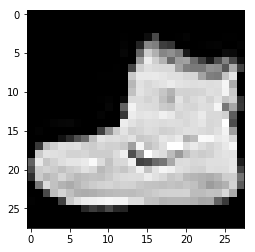

In [24]:
# len(training_set)
sample = next(iter(training_set))
image , label = sample
print("sample image shape is 1, 28, 28")
image.shape  #returns ([1, 28, 28]) 

#one channel : grayscale xa so depth of the frontview is 1

#plt.imshow(image.squeeze()) #need to squeeze the data to 2 dimensions to be displayable on the 2D screen
#however, imshow() maps the provided data into RGBA values 


#When you have a 2D array, such as data above, the values at each grid point is a float between 0 and 1. 
#maps between Blue = 0 and Red = 1 by default if no colormap specified as argument for imshow()
#The gray colormap maps 0 to black and 1 to white and that is what we want, we wanna work on grayscale

plt1.imshow(image.squeeze(),cmap = "gray") #removing the depth dimention to make displayable on the screen



print("The category for this sample image in the training set is  " +str(label))
batch = next(iter(data_loader))
images, labels = batch

#If you print images.shape, you shall see [10, 1, 28, 28] : 10 images in this batch, 1 color depth, 28pixels high
#28 pixels wide, so euta filter ma ma yo 4D tensor janxa input
#if you print the shape of labels, you shall see [10] which is a rank 1 tensor with 10 values
#note: rank 1 tensor is not the same as a rank 2 tensor with height 1

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


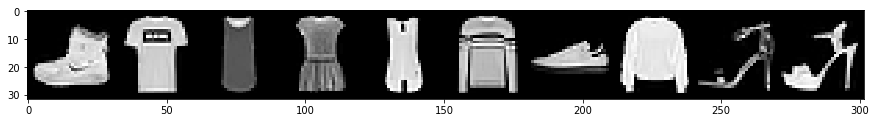

In [25]:
grid = torchvision.utils.make_grid(images, nrow = 10) #create a grid to display our tensor with 10 images in a row

#nrow specifies how many elements should the grid display in 1 row
#grid.shape
#if you check grid.shape it is [ 3,32,302]  = 3, 28 with 2px padding on each side, 280 with 2 px padding 
import numpy as np
plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid, (1,2,0))) #permute the axes of grid to the new arrangement 
#grid's 1st axis i.e. the axis along the rows = vertical axis to come first
#then the 2nd axis
#grid ko 3rd axis = depth RGB combination ma dekhinxa as a pixel color intensity


print('labels:', labels)